In [ ]:
!pip install timm==0.9.2

In [6]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import os
import timm
import random
import matplotlib.ticker as ticker
import torch.nn.functional as F
import json
import torchvision
import cv2
import mlflow

from tqdm import tqdm, trange
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader, Dataset
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor
from pathlib import Path
from PIL import Image
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch import optim
from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights

from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image, deprocess_image
from pytorch_grad_cam import GuidedBackpropReLUModel


In [18]:
transform = transforms.Compose([
    transforms.Resize([224,224]),
    transforms.ToTensor(),
])

2023/07/06 10:24:26 WARNING mlflow.pytorch: Stored model version '1.12.0a0+8a1a93a' does not match installed PyTorch version '1.12.0'


In [8]:
print(model)

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False

2023/07/06 10:25:42 WARNING mlflow.pytorch: Stored model version '1.12.0a0+8a1a93a' does not match installed PyTorch version '1.12.0'


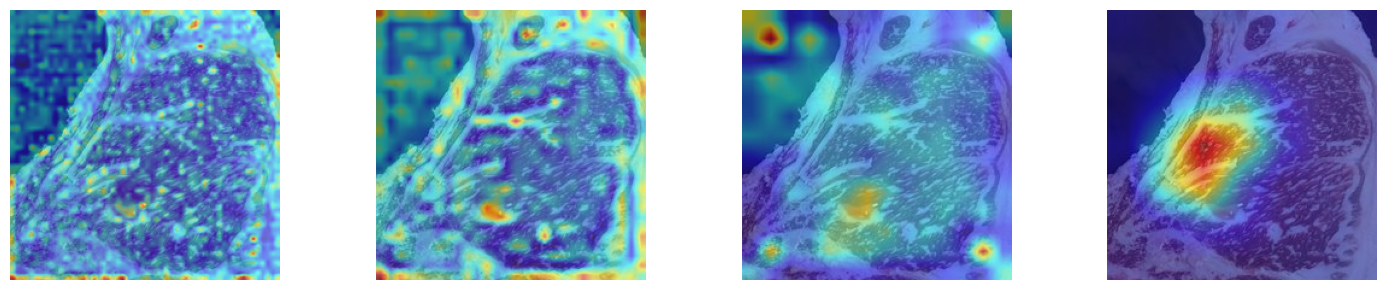

In [26]:
###### resnet152 #######
logged_model = '/Users/jeesuppark/Downloads/car_test/mlruns/2/7157531a0e0047a6a718df6faa48d036/artifacts/best'
model = mlflow.pytorch.load_model(logged_model, map_location=torch.device('cpu'))


target_layers = [model.layer1[-1], model.layer2[-1], model.layer3[-1], model.layer4[-1]]

# Load and preprocess the image
img = Image.open("/Users/jeesuppark/Downloads/cropped_224_1/QC_cow_segmentation_1_000014.jpg")
# img = img.resize((224, 224))
input_tensor = transform(img).unsqueeze(0)

# Create GradCAM instances for each target layer
# GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
cams = [GradCAMPlusPlus(model=model, target_layers=[layer], use_cuda=False) for layer in target_layers]

# Specify the class target
targets = [ClassifierOutputTarget(1)]

# Compute the gradients and visualizations for each layer
visualizations = []
for cam in cams:
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]
    img_normalized = np.float32(img) / 255.0
    visualization = show_cam_on_image(img_normalized, grayscale_cam, use_rgb=True)
    visualizations.append(visualization)

# Create subplots for each layer visualization
num_layers = len(visualizations)
fig, axs = plt.subplots(1, num_layers, figsize=(15, 3))

# Display each layer visualization in a separate subplot
for i in range(num_layers):
    axs[i].imshow(visualizations[i])
    axs[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [74]:

logged_model = '/Users/jeesuppark/Downloads/car_test/mlruns/2/7157531a0e0047a6a718df6faa48d036/artifacts/best'
model = mlflow.pytorch.load_model(logged_model, map_location=torch.device('cpu'))


2023/07/06 14:35:46 WARNING mlflow.pytorch: Stored model version '1.12.0a0+8a1a93a' does not match installed PyTorch version '1.12.0'


In [75]:
for name, module in model.named_modules():
    print(name)


conv1
conv1.0
conv1.1
conv1.2
conv1.3
conv1.4
conv1.5
conv1.6
bn1
act1
maxpool
maxpool.0
maxpool.1
maxpool.2
layer1
layer1.0
layer1.0.conv1
layer1.0.bn1
layer1.0.act1
layer1.0.conv2
layer1.0.bn2
layer1.0.drop_block
layer1.0.act2
layer1.0.aa
layer1.0.conv3
layer1.0.bn3
layer1.0.se
layer1.0.se.fc1
layer1.0.se.bn
layer1.0.se.act
layer1.0.se.fc2
layer1.0.se.gate
layer1.0.act3
layer1.0.downsample
layer1.0.downsample.0
layer1.0.downsample.1
layer1.0.downsample.2
layer1.1
layer1.1.conv1
layer1.1.bn1
layer1.1.act1
layer1.1.conv2
layer1.1.bn2
layer1.1.drop_block
layer1.1.act2
layer1.1.aa
layer1.1.conv3
layer1.1.bn3
layer1.1.se
layer1.1.se.fc1
layer1.1.se.bn
layer1.1.se.act
layer1.1.se.fc2
layer1.1.se.gate
layer1.1.act3
layer1.2
layer1.2.conv1
layer1.2.bn1
layer1.2.act1
layer1.2.conv2
layer1.2.bn2
layer1.2.drop_block
layer1.2.act2
layer1.2.aa
layer1.2.conv3
layer1.2.bn3
layer1.2.se
layer1.2.se.fc1
layer1.2.se.bn
layer1.2.se.act
layer1.2.se.fc2
layer1.2.se.gate
layer1.2.act3
layer2
layer2.0
laye

2023/07/06 11:05:20 WARNING mlflow.pytorch: Stored model version '1.12.0a0+8a1a93a' does not match installed PyTorch version '1.12.0'


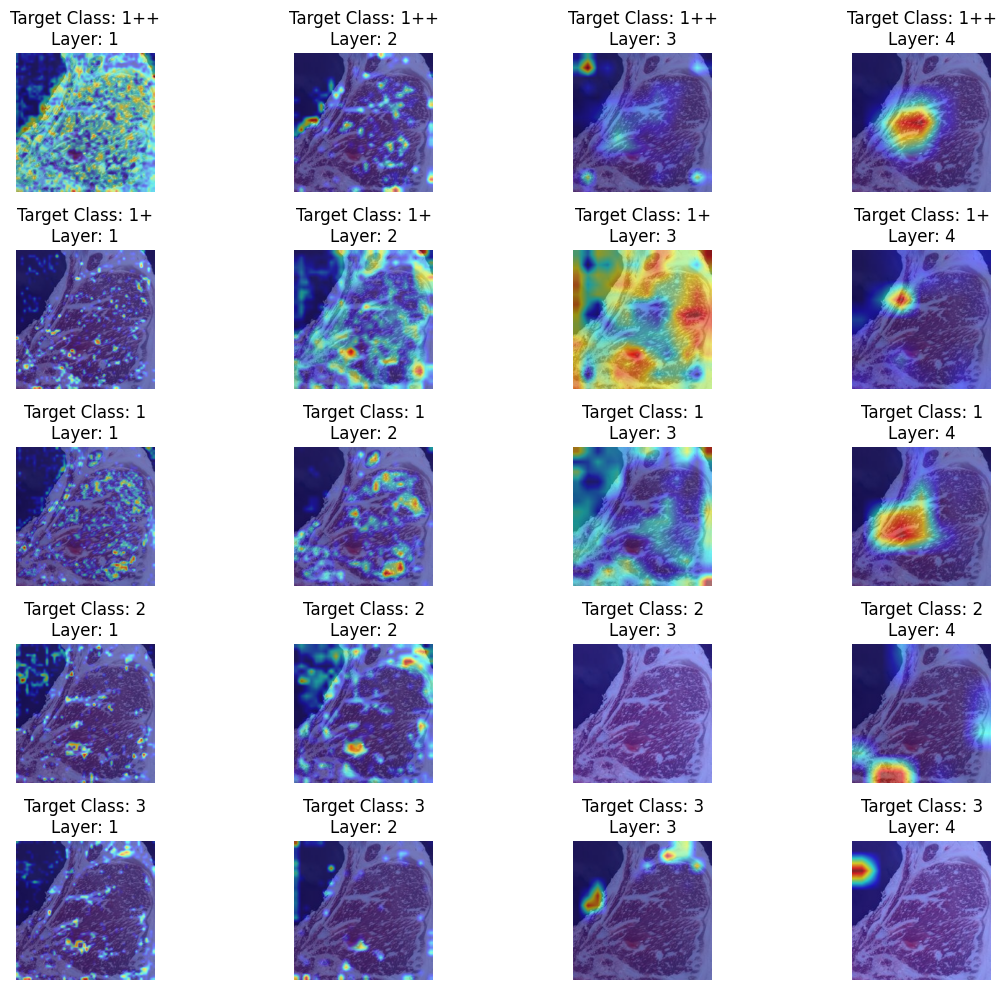

In [54]:
logged_model = '/Users/jeesuppark/Downloads/car_test/mlruns/2/7157531a0e0047a6a718df6faa48d036/artifacts/best'
model = mlflow.pytorch.load_model(logged_model, map_location=torch.device('cpu'))

target_layers = [model.layer1[-1], model.layer2[-1], model.layer3[-1], model.layer4[-1]]
img = Image.open("/Users/jeesuppark/Downloads/cropped_224_1/QC_cow_segmentation_1_000014.jpg")

input_tensor = transform(img).unsqueeze(0)

# GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
cams = [GradCAM(model=model, target_layers=[layer], use_cuda=False) for layer in target_layers]

target_classes = [0, 1, 2, 3, 4]  # Specify the target classes

# Create target class titles
target_class_titles = ["1++", "1+", "1", "2", "3"]

# Compute the gradients and visualizations for each layer and target class
visualizations = []
for cam in cams:
    class_visualizations = []
    for target_class in target_classes:
        targets = [ClassifierOutputTarget(target_class)]
        grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
        grayscale_cam = grayscale_cam[0, :]
        img_normalized = np.float32(img) / 255.0
        visualization = show_cam_on_image(img_normalized, grayscale_cam, use_rgb=True)
        class_visualizations.append(visualization)
    visualizations.append(class_visualizations)

# Create subplots for each layer visualization and target class
num_layers = len(visualizations)
num_classes = len(target_classes)
fig, axs = plt.subplots(num_classes, num_layers, figsize=(3*num_layers, 10))

# Display each layer visualization for each target class in a separate subplot
for i in range(num_classes):
    for j in range(num_layers):
        axs[i, j].imshow(visualizations[j][i])
        axs[i, j].axis('off')
        axs[i, j].set_title(f"Target Class: {target_class_titles[i]}\nLayer: {j+1}")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [77]:
def visualize_model(model, img_path, cam_type):
    # Load the image
    img = Image.open(img_path)

    # Preprocess the image
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    input_tensor = transform(img).unsqueeze(0)

    # Specify the target layers
    target_layers = [model.layer1[-1], model.layer2[-1], model.layer3[-1], model.layer4[-1]]

    # GradCAM instances for each target layer
    if cam_type == 'GradCAM':
        cams = [GradCAM(model=model, target_layers=[layer], use_cuda=False) for layer in target_layers]
    elif cam_type == 'HiResCAM':
        cams = [HiResCAM(model=model, target_layers=[layer], use_cuda=False) for layer in target_layers]
    elif cam_type == 'ScoreCAM':
        cams = [ScoreCAM(model=model, target_layers=[layer], use_cuda=False) for layer in target_layers]
    elif cam_type == 'GradCAMPlusPlus':
        cams = [GradCAMPlusPlus(model=model, target_layers=[layer], use_cuda=False) for layer in target_layers]
    elif cam_type == 'AblationCAM':
        cams = [AblationCAM(model=model, target_layers=[layer], use_cuda=False) for layer in target_layers]
    elif cam_type == 'XGradCAM':
        cams = [XGradCAM(model=model, target_layers=[layer], use_cuda=False) for layer in target_layers]
    elif cam_type == 'EigenCAM':
        cams = [EigenCAM(model=model, target_layers=[layer], use_cuda=False) for layer in target_layers]
    elif cam_type == 'FullGrad':
        cams = [FullGrad(model=model, target_layers=[layer], use_cuda=False) for layer in target_layers]

    # Target classes and titles
    target_classes = [0, 1, 2, 3, 4]
    target_class_titles = ["1++", "1+", "1", "2", "3"]

    # Compute the gradients and visualizations for each layer and target class
    visualizations = []
    for cam in cams:
        class_visualizations = []
        for target_class in target_classes:
            targets = [ClassifierOutputTarget(target_class)]
            grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
            grayscale_cam = grayscale_cam[0, :]
            img_normalized = np.float32(img) / 255.0
            visualization = show_cam_on_image(img_normalized, grayscale_cam, use_rgb=True)
            class_visualizations.append(visualization)
        visualizations.append(class_visualizations)

    # Create subplots for each layer visualization and target class
    num_layers = len(visualizations)
    num_classes = len(target_classes)
    fig, axs = plt.subplots(num_classes, num_layers, figsize=(3 * num_layers, 10))

    # Display each layer visualization for each target class in a separate subplot
    for i in range(num_classes):
        for j in range(num_layers):
            axs[i, j].imshow(visualizations[j][i])
            axs[i, j].axis('off')
            axs[i, j].set_title(f"Target Class: {target_class_titles[i]}\nLayer: {j+1}")

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


In [101]:
def visualize_cnn_model(model, img_path, cam_type):
    # Load the image
    img = Image.open(img_path)

    # Preprocess the image
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    input_tensor = transform(img).unsqueeze(0)

    # Specify the target layers
    target_layers = [model.layer4[-1]]

    # GradCAM instances for each target layer
    if cam_type == 'GradCAM':
        cam = GradCAM(model=model, target_layers=target_layers, use_cuda=False)
    elif cam_type == 'HiResCAM':
        cam = HiResCAM(model=model, target_layers=target_layers, use_cuda=False)
    elif cam_type == 'ScoreCAM':
        cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=False)
    elif cam_type == 'GradCAMPlusPlus':
        cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=False)
    elif cam_type == 'AblationCAM':
        cam = AblationCAM(model=model, target_layers=target_layers, use_cuda=False)
    elif cam_type == 'XGradCAM':
        cam = XGradCAM(model=model, target_layers=target_layers, use_cuda=False)
    elif cam_type == 'EigenCAM':
        cam = EigenCAM(model=model, target_layers=target_layers, use_cuda=False)
    elif cam_type == 'FullGrad':
        cam = FullGrad(model=model, target_layers=target_layers, use_cuda=False)

    # Target classes and titles
    target_classes = [0, 1, 2, 3, 4]
    target_class_titles = ["1++", "1+", "1", "2", "3"]

    # Compute the gradients and visualizations for each layer and target class
    visualizations = []
    for target_class in target_classes:
        targets = [ClassifierOutputTarget(target_class)]
        grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
        grayscale_cam = grayscale_cam[0, :]
        img_normalized = np.float32(img) / 255.0
        visualization = show_cam_on_image(img_normalized, grayscale_cam, use_rgb=True)
        visualizations.append(visualization)

    # Create subplots for each layer visualization and target class
    num_classes = len(target_classes)
    fig, axs = plt.subplots(1, num_classes, figsize=(3 * num_layers, 10))

    # Display each layer visualization for each target class in a separate subplot
    for i in range(num_classes):
        axs[i].imshow(visualizations[i])
        axs[i].axis('off')
        axs[i].set_title(f"Target Class: {target_class_titles[i]}\n")

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

img_path = "/Users/jeesuppark/Downloads/cropped_224_1/QC_cow_segmentation_1_000504.jpg"
# GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
visualize_cnn_model(model, img_path, "XGradCAM")

2023/07/06 11:17:53 WARNING mlflow.pytorch: Stored model version '1.12.0a0+8a1a93a' does not match installed PyTorch version '1.12.0'


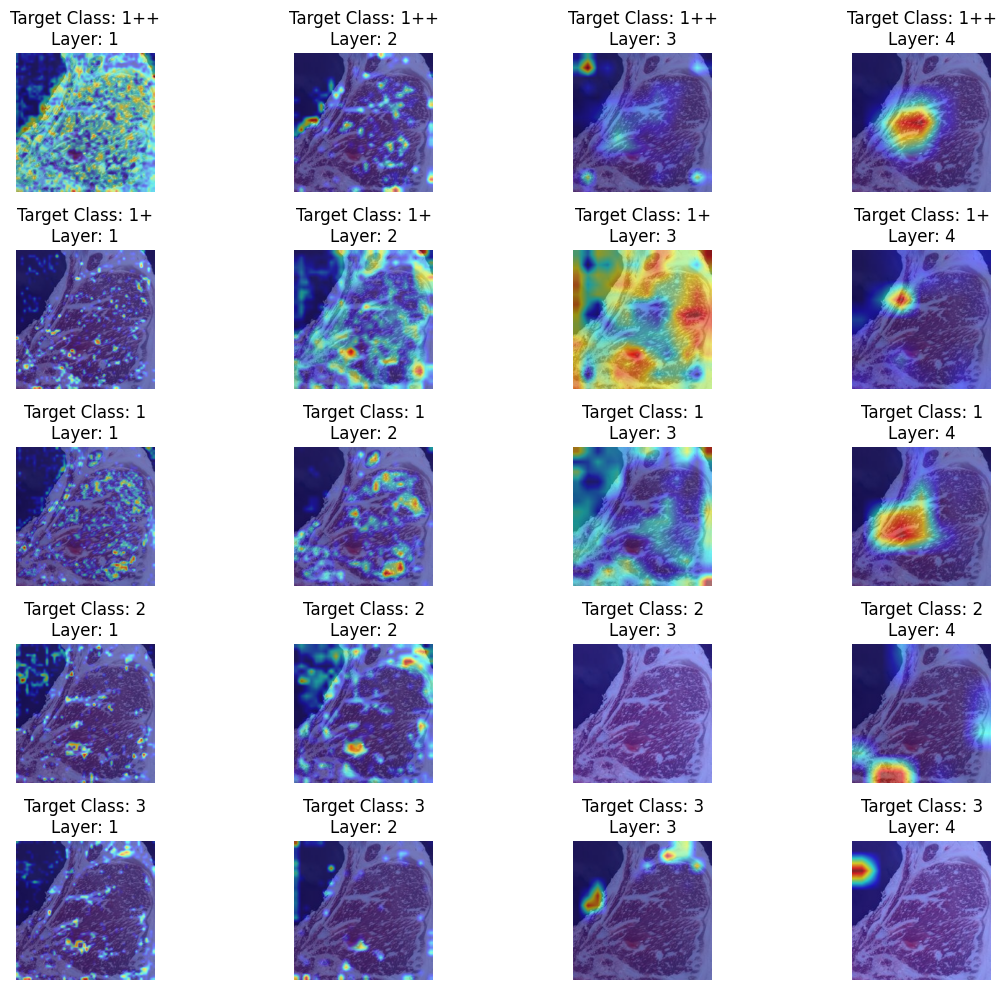

In [70]:
# Example usage
logged_model = '/Users/jeesuppark/Downloads/car_test/mlruns/2/7157531a0e0047a6a718df6faa48d036/artifacts/best'
model = mlflow.pytorch.load_model(logged_model, map_location=torch.device('cpu'))
img_path = "/Users/jeesuppark/Downloads/cropped_224_1/QC_cow_segmentation_1_000014.jpg"

# GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
visualize_model(model, img_path, "GradCAM")

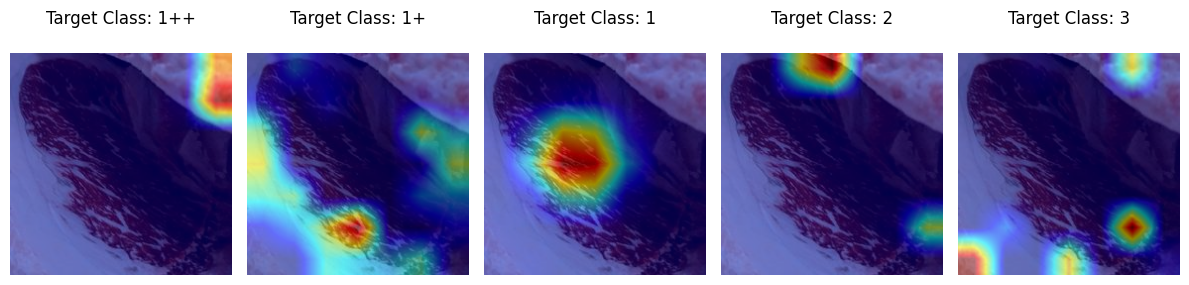

In [102]:
img_path = "/Users/jeesuppark/Downloads/cropped_224_1/QC_cow_segmentation_1_000504.jpg"
# GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
visualize_cnn_model(model, img_path, "XGradCAM")